<a href="https://colab.research.google.com/github/yohanesnuwara/ML_for_physicist/blob/master/mini-project/eor_screening_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application of Neural Network for Enhanced Oil Recovery (EOR) Screening**

### A mini-project for "Machine Learning for Physicists 2020" Summer School by **Yohanes Nuwara**

### **What is the input for the neural network?**

![image](https://user-images.githubusercontent.com/51282928/87507610-e60a0880-c697-11ea-8bed-30ac670fa9f5.png)

Taber et al (1997) in their SPE-35385-PA paper described 9 reservoir fluid and rock properties used for screening of EOR methods. 

<div>
<img src="https://user-images.githubusercontent.com/51282928/87650653-2cd12e80-c77c-11ea-85a2-fea2756df0a4.png" width="500"/>
</div>

The **blue** boxes represent **reservoir fluid properties**, and the **brown** boxes represent **reservoir rock properties**

As seen in **Table 3** above, 3 parameters of these nine are categorical, namely:

* Chemical composition of oil
* Type of reservoir rock formation
* Net thickness of reservoir

To simplify our neural network job, we will only consider 6 numerical parameters (**the starred ones ***), except the 3 categorical ones. So, the parameters are reduced to as follows:

* Gravity of oil
* Viscosity of oil
* Saturation of oil in the reservoir pores
* Average permeability of reservoir rock
* Depth of reservoir
* Temperature of reservoir

We will focus only on these 6 parameters, as the **feature input** for the neural network. 

Of course, the 3 categorical parameters could be encoded later during neural network application, but these will be our later work. 

### **What is the output for the neural network?**

In the paper there are overall 9 EOR methods discussed. 

<div>
<img src="https://user-images.githubusercontent.com/51282928/87651654-5dfe2e80-c77d-11ea-856c-5a67c2c3e68b.png" width="500"/>
</div>

Each color of the boxes represents the category of EOR methods. The **blue** boxes represent **gas injection**, the **brown** boxes represent **chemical flooding**, and the **green** boxes represent **thermal/mechanical method**.

We reduced to only 7 EOR methods (**the starred ones ***), namely:

1. Miscible Nitrogen (N2) injection
2. Miscible Carbon dioxide (CO2) injection
3. Miscible hydrocarbon injection 
4. Immiscible gas injection 
5. Alkali-Surfactant-Polymer (ASP) flooding 
6. Polymer flooding 
7. Steam flooding 

### **What will the Neural Network do?**

![image](https://user-images.githubusercontent.com/51282928/87641417-42d9f180-c772-11ea-9985-7c1d10a092bc.png)

Through neural network, as much as **245 synthetic datasets** (assuming from 245 EOR oilfields currently in the world) with these 6 observed parameters are used as the **training data** to be **fitted**. 

Also, **50 synthetic datasets** are created for the **test data**. The model fit will predict **which methods of EOR suitable** for each test field is.





# Worflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 1. Create individual synthetic data for 6 parameters (TRAIN)

245 synthetic datasets (represent 245 oil fields) are generated, on random numbers with triangular distribution. 

Triangular distribution receives four inputs: `min` minimum range of values, `max` maximum range, `mode` most frequent values, and `n` number of values generated. 

First, make a function to generate these random values, for the 6 reservoir fluid and rock properties.

* `api` for oil gravity
* `visco` for oil viscosity
* `oilsat` for oil saturation
* `perm` for reservoir rock permeability
* `depth` for reservoir depth
* `temp` for reservoir temperature

In [2]:
# Functions to generate normally distributed random numbers of reservoir and
# fluid parameters

def generate_api(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_visco(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_oilsat(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_perm(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_depth(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_temp(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

Now, generate the synthetic random datasets. Each parameter is given the same number of random values, `n=35`, so at the end we will have 245 datasets. 

`min` and `max` values are obtained from criteria values in **Table 3** above. `mode` is assumed equal to the average value. 

Create also the labels, represented by each of EOR type.

Histogram of each generated dataset is shown.

202.0680100943616


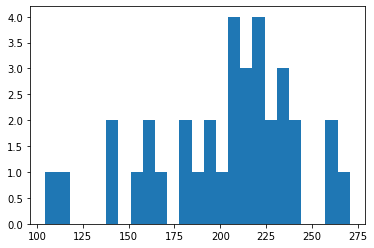

In [35]:
# generate data for N2 injection
api_nitro = generate_api(48, 35, 55, 35)
visco_nitro = generate_visco(0.2, 0.01, 0.4, 35)
oilsat_nitro = generate_oilsat(0.75, 0.4, 0.8, 35)
perm_nitro = generate_perm(2500, 1, 5000, 35)
depth_nitro = generate_depth(8000, 6000, 10000, 35)
temp_nitro = generate_temp(210, 95, 300, 35)
label_nitro = np.full(35, 'Nitrogen')

a = temp_nitro

print(np.mean(a))
plt.hist(a, bins=25)
plt.show()

202.0680100943616


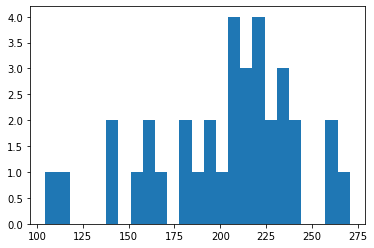

In [37]:
# generate data for hydrocarbon injection
api_hc = generate_api(41, 5, 50, 35)
visco_hc = generate_visco(0.5, 0.01, 3, 35)
oilsat_hc = generate_oilsat(0.8, 0.3, 0.9, 35)
perm_hc = generate_perm(2500, 1, 5000, 35)
depth_hc = generate_depth(6000, 4000, 10000, 35)
temp_hc = generate_temp(210, 95, 300, 35)
label_hc = np.full(35, 'Hydrocarbon')

a = temp_hc

print(np.mean(a))
plt.hist(a, bins=25)
plt.show()

202.0680100943616


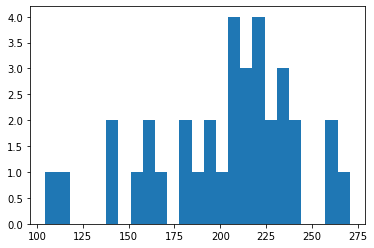

In [38]:
# generate data for CO2 injection
api_co2 = generate_api(36, 22, 47, 35)
visco_co2 = generate_visco(1.5, 0.01, 10, 35)
oilsat_co2 = generate_oilsat(0.55, 0.2, 0.8, 35)
perm_co2 = generate_perm(2500, 1, 5000, 35)
depth_co2 = generate_depth(7500, 2500, 10000, 35)
temp_co2 = generate_temp(210, 95, 300, 35)
label_co2 = np.full(35, 'CO2')

a = temp_co2

print(np.mean(a))
plt.hist(a, bins=25)
plt.show()

In [32]:
label_hc

array(['hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon', 'hydrocarbon',
       'hydrocarbon', 'hydrocarbon', 'hydrocarbon'], dtype='<U11')

202.0680100943616


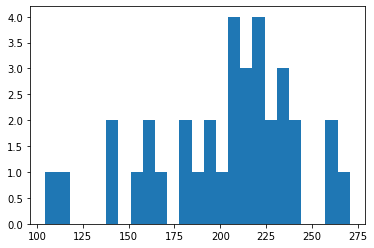

In [39]:
# generate data for immiscible gas injection
api_imm = generate_api(22, 12, 35, 35)
visco_imm = generate_visco(100, 1, 600, 35)
oilsat_imm = generate_oilsat(0.7, 0.35, 0.9, 35)
perm_imm = generate_perm(2500, 1, 5000, 35)
depth_imm = generate_depth(5500, 1800, 9000, 35)
temp_imm = generate_temp(210, 95, 300, 35)
label_imm = np.full(35, 'Immiscible')

a = temp_imm

print(np.mean(a))
plt.hist(a, bins=25)
plt.show()

216.43336784022915


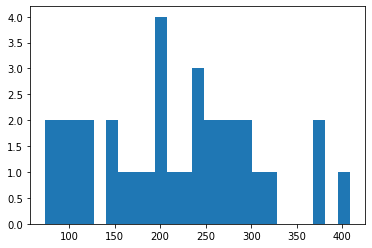

In [40]:
# generate data for alkaline flooding
api_alka = generate_api(35, 20, 40, 35)
visco_alka = generate_visco(13, 1, 35, 35)
oilsat_alka = generate_oilsat(0.53, 0.35, 0.8, 35)
perm_alka = generate_perm(450, 10, 800, 35)
depth_alka = generate_depth(3250, 1000, 15000, 35) # inconsistent range in paper
temp_alka = generate_temp(80, 70, 500, 35) # inconsistent range in paper
label_alka = np.full(35, 'ASP')

a = temp_alka

print(np.mean(a))
plt.hist(a, bins=25)
plt.show()

237.83683001156678


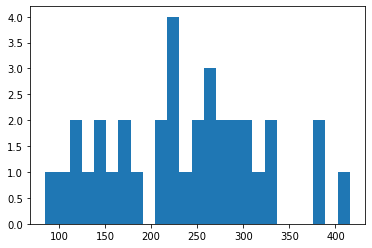

In [41]:
# generate data for polymer flooding
api_poly = generate_api(35, 15, 55, 35)
visco_poly = generate_visco(85, 10, 150, 35)
oilsat_poly = generate_oilsat(0.8, 0.5, 0.9, 35)
perm_poly = generate_perm(800, 10, 1700, 35)
depth_poly = generate_depth(4750, 500, 9000, 35) 
temp_poly = generate_temp(140, 75, 500, 35) # inconsistent range in paper
label_poly = np.full(35, 'Polymer')

a = temp_poly

print(np.mean(a))
plt.hist(a, bins=25)
plt.show()

2094.6559900558987


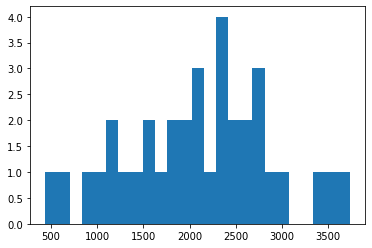

In [42]:
# generate data for steam flooding
api_steam = generate_api(13.5, 8, 25, 35)
visco_steam = generate_visco(4700, 1, 200000, 35)
oilsat_steam = generate_oilsat(0.66, 0.4, 0.9, 35)
perm_steam = generate_perm(2540, 200, 5000, 35)
depth_steam = generate_depth(1500, 300, 4500, 35) 
temp_steam = generate_temp(210, 95, 300, 35) 
label_steam = np.full(35, 'Steam')

a = depth_steam

print(np.mean(a))
plt.hist(a, bins=25)
plt.show()

### Step 2. Append all synthetic data (TRAIN)

Next, the individual synthetic datasets of each parameter are concatenated, so we have complete 245 number of observations, each consists of the 6 measured parameters.

In [43]:
api = np.concatenate([api_nitro, api_hc, api_co2, api_imm, api_alka, api_poly, api_steam], axis=0)
visco = np.concatenate([visco_nitro, visco_hc, visco_co2, visco_imm, visco_alka, visco_poly, visco_steam], axis=0)
oilsat = np.concatenate([oilsat_nitro, oilsat_hc, oilsat_co2, oilsat_imm, oilsat_alka, oilsat_poly, oilsat_steam], axis=0)
perm = np.concatenate([perm_nitro, perm_hc, perm_co2, perm_imm, perm_alka, perm_poly, perm_steam], axis=0)
depth = np.concatenate([depth_nitro, depth_hc, depth_co2, depth_imm, depth_alka, depth_poly, depth_steam], axis=0)
temp = np.concatenate([temp_nitro, temp_hc, temp_co2, temp_imm, temp_alka, temp_poly, temp_steam], axis=0)
label = np.concatenate([label_nitro, label_hc, label_co2, label_imm, label_alka, label_poly, label_steam], axis=0)

In [44]:
train_df = pd.DataFrame({'Density': api, 'Viscosity': visco, 'Oil Saturation': oilsat, 
                         'Permeability': perm, 'Depth': depth, 'Temperature': temp,
                         'Label': label})
train_df

,Density,Viscosity,Oil Saturation,Permeability,Depth,Temperature,Label
0,49.341810,0.266445,0.728611,3309.461547,8647.433974,235.045138,Nitrogen
1,37.322823,0.049214,0.453901,510.159845,6407.450113,117.118481,Nitrogen
2,47.835441,0.230957,0.697844,2860.261422,8288.037932,217.785706,Nitrogen
3,49.069784,0.260024,0.723779,3228.186387,8582.407344,231.922336,Nitrogen
4,46.384719,0.202221,0.664180,2496.515848,7997.011792,203.408039,Nitrogen
...,...,...,...,...,...,...,...
240,18.829193,112776.471685,0.747117,3483.449806,2933.415269,240.053090,Steam
241,15.329530,63309.221945,0.660412,2623.365736,2044.955015,205.895589,Steam
242,20.773992,140265.948783,0.795300,3961.407676,3427.142087,258.946034,Steam
243,13.463385,36934.045825,0.603717,2093.583838,1571.241683,181.752469,Steam


Histogram and scatter plots are shown, using `seaborn` library.

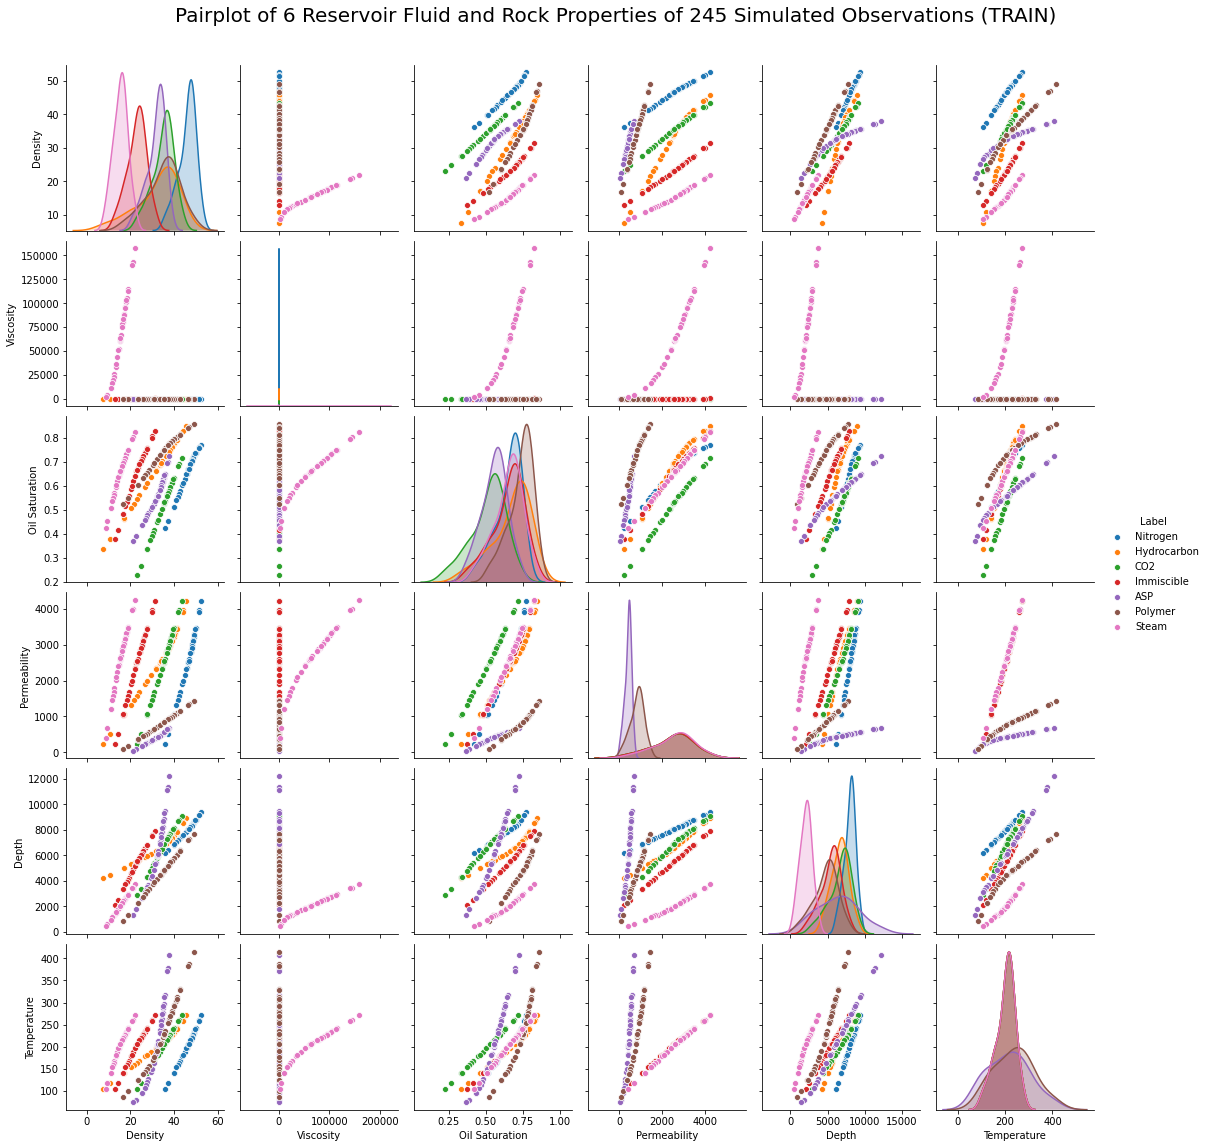

In [45]:
g = sns.pairplot(train_df, hue = 'Label');
g.fig.suptitle("Pairplot of 6 Reservoir Fluid and Rock Properties of 245 Simulated Observations (TRAIN)", size=20, y=1.05)
plt.show()

Finally, the heatmap (Pearson correlation) of each simulated parameters.

In [13]:
# df_for_corr = train_df.iloc[:,0:-1]
# corr = df_for_corr.corr()

# mask = np.zeros(corr.shape, dtype=bool)
# mask[np.triu_indices(len(mask))] = True

# fig = plt.gcf()
# fig.set_size_inches(12, 8)

# g = sns.heatmap(corr, annot=True, vmin=-0.8, vmax=0.8, cmap='seismic', mask=mask)
# plt.show()

### Step 3. Generate 50 synthetic data for prediction (TEST)

Generate 50 synthetic datasets (observations) for each 6 parameters, with the same technique of generating random numbers, but now considering `uniform` distribution. Except for `visco`, because of its only different distribution, use `triangular`. Notice its unique structure.

Now, without generating labels, because these datasets for prediction.

In [164]:
np.random.seed(10)

api_pred = np.random.uniform(min(api), max(api), size=(50,))
visco_pred = np.concatenate([(np.random.triangular(min(visco), 1, 3, 20)), (np.random.triangular(3, 10, 100, 20)), (np.random.uniform(100, 200000, size=(10,)))], axis=0)
oilsat_pred = np.random.uniform(min(oilsat), max(oilsat), size=(50,))
perm_pred = np.random.uniform(min(perm), max(perm), size=(50,))
depth_pred = np.random.uniform(min(depth), max(depth), size=(50,))
temp_pred = np.random.uniform(min(temp), max(temp), size=(50,))

In [168]:
pred_df = pd.DataFrame({'Density': api_pred, 'Viscosity': visco_pred, 'Oil Saturation': oilsat_pred, 
                         'Permeability': perm_pred, 'Depth': depth_pred, 'Temperature': temp_pred})
pred_df.head(10)

,Density,Viscosity,Oil Saturation,Permeability,Depth,Temperature
0,42.174121,1.099502,0.591881,1898.272439,10030.091904,284.001336
1,8.461175,0.547025,0.765089,746.941782,9694.672818,199.777736
2,35.990353,1.968657,0.271562,2181.989244,5079.490850,348.216543
3,41.162746,0.688300,0.520533,3496.096781,10633.306893,288.392244
4,29.920278,1.086384,0.719881,426.495580,4968.801918,354.512796
5,17.626156,2.424314,0.680098,3416.224168,3474.675445,172.540221
6,16.425367,2.728750,0.596833,2426.855745,10219.744516,167.945180
7,41.689475,1.202029,0.252091,2528.854562,9123.044468,279.340803
8,15.124942,1.983222,0.449017,881.269934,6425.698507,394.562396
9,11.496988,0.879779,0.582494,1883.588371,8037.699725,315.616413


Also, create the pairplot.

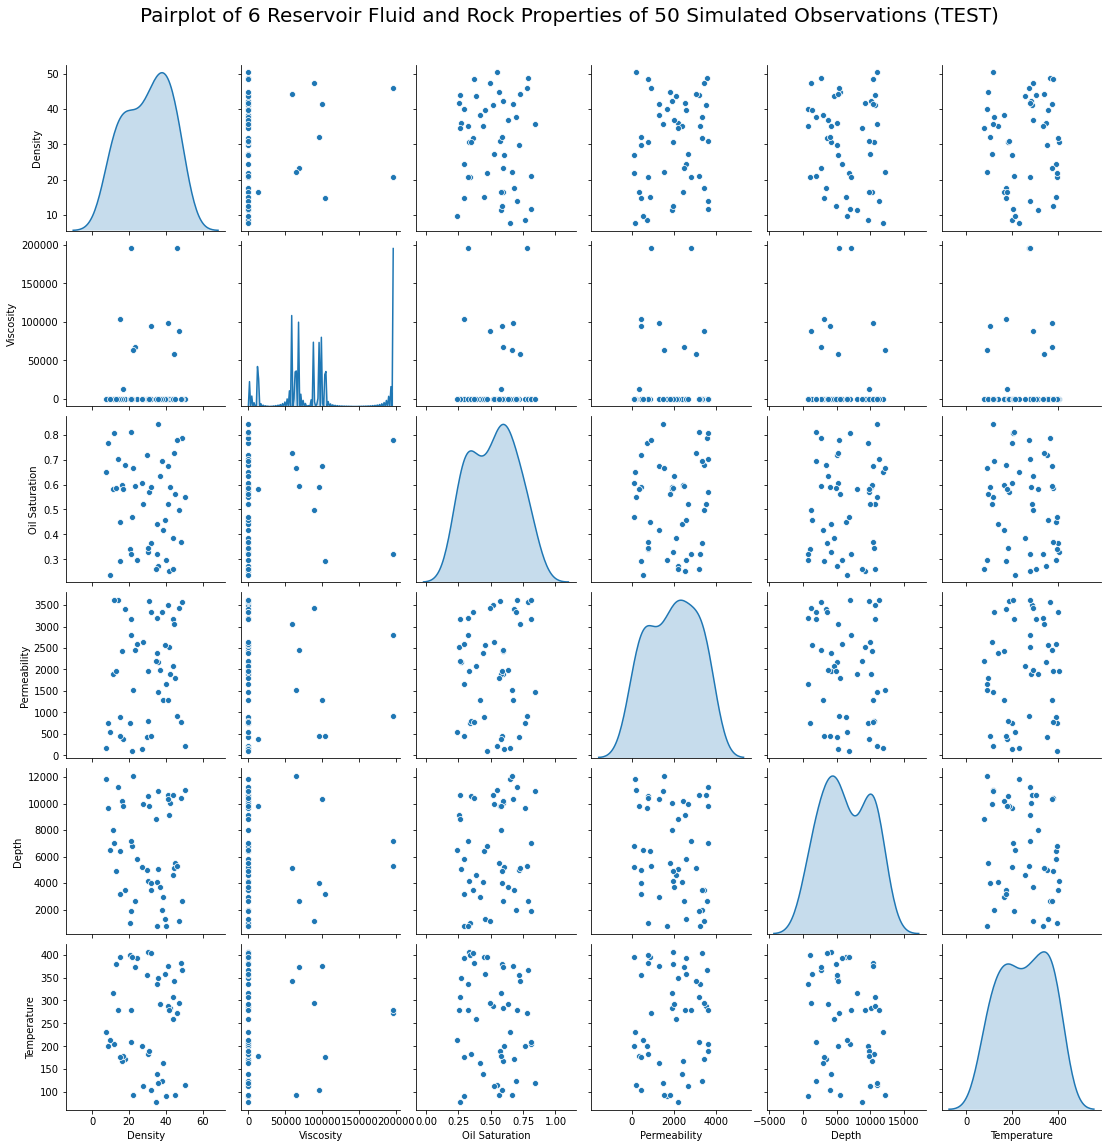

In [166]:
g = sns.pairplot(pred_df, diag_kind = 'kde');
g.fig.suptitle("Pairplot of 6 Reservoir Fluid and Rock Properties of 50 Simulated Observations (TEST)", size=20, y=1.05)
plt.show()

### Neural network 

#### Adam Optimizer

In [233]:
# dataset for prediction
X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1:].astype(str).values # convert to string

# dataset for prediction
X_pred = pred_df.values

# encoding y_train labels
from sklearn.preprocessing import OneHotEncoder

y_train = np.array(list(y_train)).reshape(-1,1)

ohe = OneHotEncoder()
ohe.fit(y_train)
y_train = ohe.transform(y_train).todense()
y_train.shape

(245, 7)

In [170]:
X_pred.shape

(50, 6)

In [171]:
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = X_train.shape[1]

model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the output layer, 2 nodes because it's binary classification
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
245/245 [==============================] - 0s 305us/step - loss: 2879.6486 - accuracy: 0.1918
Epoch 2/100
245/245 [==============================] - 0s 49us/step - loss: 1667.3147 - accuracy: 0.1510
Epoch 3/100
245/245 [==============================] - 0s 47us/step - loss: 681.2367 - accuracy: 0.2939
Epoch 4/100
245/245 [==============================] - 0s 45us/step - loss: 123.7784 - accuracy: 0.2571
Epoch 5/100
245/245 [==============================] - 0s 49us/step - loss: 53.2026 - accuracy: 0.5265
Epoch 6/100
245/245 [==============================] - 0s 49us/step - loss: 20.5868 - accuracy: 0.5347
Epoch 7/100
245/245 [==============================] - 0s 62us/step - loss: 13.4264 - accuracy: 0.5224
Epoch 8/100
245/245 [==============================] - 0s 60us/step - loss: 7.8455 - accuracy: 0.6408
Epoch 9/100
245/245 [==============================] - 0s 61us/step - loss: 4.8638 - accuracy: 0.6571
Epoch 10/100
245/245 [==============================] - 0s 60us/step

In [172]:
# apply model to predict on X_pred dataset
y_pred = model.predict(X_pred)

# decode the result back to original labels
y_result = np.array(ohe.inverse_transform(y_pred)).reshape(-1)

In [173]:
result_df = pd.DataFrame({'Density': api_pred, 'Viscosity': visco_pred, 'Oil Saturation': oilsat_pred, 
                         'Permeability': perm_pred, 'Depth': depth_pred, 'Temperature': temp_pred,
                         'Label': y_result})

result_df.head(50)

,Density,Viscosity,Oil Saturation,Permeability,Depth,Temperature,Label
0,42.174121,1.099502,0.591881,1898.272439,10030.091904,284.001336,Nitrogen
1,8.461175,0.547025,0.765089,746.941782,9694.672818,199.777736,ASP
2,35.990353,1.968657,0.271562,2181.989244,5079.490850,348.216543,Immiscible
3,41.162746,0.688300,0.520533,3496.096781,10633.306893,288.392244,CO2
4,29.920278,1.086384,0.719881,426.495580,4968.801918,354.512796,Polymer
5,17.626156,2.424314,0.680098,3416.224168,3474.675445,172.540221,CO2
6,16.425367,2.728750,0.596833,2426.855745,10219.744516,167.945180,Nitrogen
7,41.689475,1.202029,0.252091,2528.854562,9123.044468,279.340803,CO2
8,15.124942,1.983222,0.449017,881.269934,6425.698507,394.562396,Polymer
9,11.496988,0.879779,0.582494,1883.588371,8037.699725,315.616413,Hydrocarbon


#### Optimum Hidden Layers and Neurons for Adam Optimizer

With train-test split

In [200]:
# split dataset into train-test
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=.2, random_state=0)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Activation

# create function to build model
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=n_cols))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(7)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)
model

Without train-test split and scaler

In [236]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_pred = sc.transform(X_pred)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Activation

# create function to build model
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=n_cols))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(7)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)
model

In [237]:
layers = [(100,), (100, 50), (100, 50, 25)]
activations = ['sigmoid', 'relu', 'softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [238]:
grid_result = grid.fit(X_train, y_train)

In [239]:
[grid_result.best_score_, grid_result.best_params_]

[0.8571428656578064,
 {'activation': 'softmax', 'batch_size': 128, 'epochs': 30, 'layers': (100,)}]

In [241]:
y_pred = grid.predict(X_pred)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

#### Stochastic Gradient Descent Optimizer

In [126]:
from keras.optimizers import SGD

n_cols = X_train.shape[1]

model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# add second layer
# model.add(Dense(100, activation='relu'))

# Add the output layer, 2 nodes because it's binary classification
model.add(Dense(7, activation='softmax'))

lr_to_test = [100]

for lr in lr_to_test:
  my_optimizer = SGD(lr=lr)
  model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=30)


# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Fit the model
# model.fit(X_train, y_train, epochs=100)

Epoch 1/30
245/245 [==============================] - 0s 180us/step - loss: 17762674967648705546551296.0000 - accuracy: 0.1796
Epoch 2/30
245/245 [==============================] - 0s 53us/step - loss: 40.8649 - accuracy: 0.1837
Epoch 3/30
245/245 [==============================] - 0s 52us/step - loss: 41.6949 - accuracy: 0.1306
Epoch 4/30
245/245 [==============================] - 0s 51us/step - loss: 44.6287 - accuracy: 0.1265
Epoch 5/30
245/245 [==============================] - 0s 50us/step - loss: 41.0348 - accuracy: 0.1551
Epoch 6/30
245/245 [==============================] - 0s 55us/step - loss: 45.5121 - accuracy: 0.1265
Epoch 7/30
245/245 [==============================] - 0s 60us/step - loss: 43.7545 - accuracy: 0.1102
Epoch 8/30
245/245 [==============================] - 0s 51us/step - loss: 40.1241 - accuracy: 0.1633
Epoch 9/30
245/245 [==============================] - 0s 52us/step - loss: 40.0216 - accuracy: 0.1592
Epoch 10/30
245/245 [==============================] - 0s